In [1]:
import pandas as pd
import pandasql as ps
import time 
import numpy as np
import re
from selenium import webdriver
import matplotlib.pyplot as plt

In [2]:
aux=pd.DataFrame()

In [3]:
aux.to_excel("df_coppel.xlsx",index=False)
aux.to_excel("df_MercadoLibre.xlsx",index=False)
aux.to_excel("df_palacio.xlsx",index=False)

In [4]:
def Buscador_Precios_Selenium_Coppel(producto):
    
    ### ingresamos a la pagina web 
    path ="C:\webdriver3\chromedriver.exe"
    driver=webdriver.Chrome(path)
    url= "https://www.coppel.com/SearchDisplay?categoryId=&storeId=10151&catalogId=10051&langId=-5&sType=SimpleSearch&resultCatEntryType=2&showResultsPage=true&searchSource=Q&pageView=&pageGroup=Search&beginIndex=0&pageSize=12&searchTerm="+producto+"&authToken=-1002%252CJdh5JVzqovGDGuZIS9A0yAc11LCiDPi1CWNOoTX%252B9xo%253D"
    driver.get(url)
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    

    productos= driver.find_elements_by_class_name("product")
    
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
            
    ### accedemos a los precios base y promo de los productos 
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("product_price")[0].text.split("\n")[0])
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_promos.append(np.nan)



    df_coppel =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio_oferta":lista_promos,"precio":lista_precios})
    df_coppel["autoservicio"]="coppel"
    df_coppel["marca"]= producto
    df_coppel["fecha"]= time.strftime("%d/%m/%y")

    df_coppel = df_coppel[["fecha","autoservicio","marca","nombre","url","precio_oferta","precio"]]

    #df_coppel = df_coppel[df_coppel['nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_coppel =df_coppel.reset_index(drop=True)



    datos_webscraper=pd.read_excel("df_coppel.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_coppel],axis=0)

    datos_webscraper.to_excel("df_coppel.xlsx",index=False)

    driver.quit()
    return df_coppel

In [5]:
def Buscador_Precios_Selenium_Mercado_Libre(producto):
    path ="C:\webdriver3\chromedriver.exe"
    driver=webdriver.Chrome(path)
    url= "https://listado.mercadolibre.com.mx/"+producto+"#D[A:"+producto+"]"
    driver.get(url)

    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    productos= driver.find_elements_by_class_name("ui-search-result__wrapper")
    
    #Accedemos a los URLs de cada producto 
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)

    ##Accedemos a los nombres de cada producto
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
        
   ###Accedemos a los precios originales y precios oferta de cada producto
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price-tag-fraction")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            if len(productos[i].find_elements_by_class_name("price-tag-fraction"))==3:
                lista_promos.append(productos[i].find_elements_by_class_name("price-tag-fraction")[1].text)
            else:
                lista_promos.append(np.nan)
        except:
            lista_promos.append(np.nan)
    
    
    ###Generamos el dataframe con la información obtenida
    df_MercadoLibre =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio_oferta":lista_promos,"precio":lista_precios})
    df_MercadoLibre["autoservicio"]="Mercado Libre"
    df_MercadoLibre["marca"]= producto
    df_MercadoLibre["fecha"]= time.strftime("%d/%m/%y")

    df_MercadoLibre = df_MercadoLibre[["fecha","autoservicio","marca","nombre","url","precio_oferta","precio"]]

    df_MercadoLibre  =df_MercadoLibre.reset_index(drop=True)


    datos_webscraper=pd.read_excel("df_MercadoLibre.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_MercadoLibre],axis=0)

    datos_webscraper.to_excel("df_MercadoLibre.xlsx",index=False)

    driver.quit()
    return df_MercadoLibre

In [6]:
def Buscador_Precios_Selenium_Palacio(producto):
    
    ### ingresamos a la pagina web 
    path ="C:\webdriver3\chromedriver.exe"
    
    driver=webdriver.Chrome(path)
    url= "https://www.elpalaciodehierro.com/buscar?q="+producto
    driver.get(url)
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    

    productos= driver.find_elements_by_class_name("b-product")
    
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("b-product_tile-brand")[0].text+"  "+productos[i].find_elements_by_class_name("b-product_tile-name")[0].text)
        except:
            lista_nombres.append(np.nan)
            
    ### accedemos a los precios base y promo de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("b-product_price-value")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("b-product_price-value")[1].text)
        except:
            lista_promos.append(np.nan)



    df_palacio =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio_oferta":lista_promos,"precio":lista_precios})
    df_palacio["autoservicio"]="El Palacio de Hierro"
    df_palacio["marca"]= producto
    df_palacio["fecha"]= time.strftime("%d/%m/%y")

    df_palacio = df_palacio[["fecha","autoservicio","marca","nombre","url","precio_oferta","precio"]]

    df_palacio =df_palacio.reset_index(drop=True)


    datos_webscraper=pd.read_excel("df_palacio.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_palacio],axis=0)

    datos_webscraper.to_excel("df_palacio.xlsx",index=False)

    driver.quit()
    return df_palacio

In [7]:
def precios_floats(datos):
    #Función que convierte los precios de una base de datos a numeros 
        
    #### eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["precio_oferta"])):
        try:
            datos["precio_oferta"].iloc[i]=datos["precio_oferta"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["precio"])):
        try:
            datos["precio"].iloc[i]=datos["precio"].iloc[i].strip("$")
        except:
            pass
        
    
    ### quitamos la separacion de comas para miles
    datos["precio_oferta"]=datos["precio_oferta"].replace(",","",regex=True)
    datos["precio"]=datos["precio"].replace(",","",regex=True)
    
     
        
    ### convertimos los precios a numericos    
    datos['precio_oferta'] = pd.to_numeric(datos['precio_oferta'], errors='coerce')
    datos['precio'] = pd.to_numeric(datos['precio'], errors='coerce')

    
    
    datos.to_excel( "catalogo_limpio.xlsx",index=False)
        
     ### visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

In [9]:
##Buscamos los 4 productos en las 3 tiendas con un for
for productos in ["refrigerador","estufa","microondas","licuadora"]:
    Buscador_Precios_Selenium_Coppel(productos)
    Buscador_Precios_Selenium_Mercado_Libre(productos)
    Buscador_Precios_Selenium_Palacio(productos)
    
##Convertimos los precios a numeros
#df_coppel=precios_floats(pd.read_excel("df_coppel.xlsx"))
#df_MercadoLibre=precios_floats(pd.read_excel("df_MercadoLibre.xlsx"))
#df_palacio=precios_floats(pd.read_excel("df_palacio.xlsx"))

<ipython-input-4-72a68e7c5d1d>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-4-72a68e7c5d1d>:12: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product")
<ipython-input-5-5cd28972c50b>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-5-5cd28972c50b>:8: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("ui-search-result__wrapper")
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'https://click1.mercadolibre.com.mx/mclics/clicks/external/MLM/count?a=pDJf8SrvRjxE7k32zZj28B%2B16YVIBZqago%2F2Rqk3G3beCxhFiB%2FPwRc32d%2BFl%2F3CkhJfe1OX%2BJDkEeWuDh1JGE3tpGwHUuCNa9FaKSHGGQ

<ipython-input-6-b0e61413dec4>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-6-b0e61413dec4>:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("b-product")
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'https://click1.mercadolibre.com.mx/mclics/clicks/external/MLM/count?a=tz3c7MjreKv3wil57fsTBfy4PTD85YtHYZMydIQ2imtBK4Is2vMqZMbTlGX1J3IK6a%2BrqCoZDa2FGFjny9lQiswpVZ3gC7%2FkCcxuFxwpCNImRM4U6TNdHQYikQjtZSWD9ZO%2F71FVVyaNes0EpNFMrparVu8rUaO%2BCyaIichFes%2B5wtz8Yex%2FBv0cbAgXXiUbfvKV3QfSHt2l8PjRx2TMYJSGNtYcoXt4s3Mv48jnfh8aVtnpALOPfc7CDYXEH7Q2xavEvb1Z8u5888v6cY3yxBrtG%2F8jTJmvW%2Ff2QzwkL%2BkunrYuPCIuGQpXbSoz2LaMFg6LSrel2iNbQ6X9x1oAAjJyQftlgg25DDP%2ByWcFwyxwnzQRmHvTZrJwk%2Buij5lfcd4KvDEB4S4%2B05ksFEQ1EW9fOTQ2VmhrfNk2KrIvS4%2Be9X%2F2BJ67bnj5jjNR8BPm3Xtdi

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'https://click1.mercadolibre.com.mx/mclics/clicks/external/MLM/count?a=QoIXxcj66dDJmR1S%2F%2FvBydLMUW%2BDde7jodhfrhDr7rrsy0DTkQd%2BbbhR2wMgW4ZBaMX32NxNBlM9VeuG5MLbF3Po78PNol3sK7pxqSFvqg1eKwFVqcv%2FDXMJNSYHimKW%2Fx5ZANIjDuAJJuLQ9i9hrLb1J2GTbdeqUuQxSjapoMEAcMW7EmeWFVHnEj80C3O%2FKrUrtNwgYITwehtThkyzVYk6qktEWvJZPSp5xoa5rD6E2L02Wrs%2BP8GmatrnlWil7vt41Xwn%2Fp6ygKIYmKh06ma6Ve%2BIP5XU8t823ozq6%2Bg%2F1Mm%2BQg9BqVd72C7XaUb3rJT0kcXC9b8D4umgN%2FHdrVv4lroFg6PVhdogOSfo5lLtT9inVt%2FDJpPpRgGcEwF0X0iGZ3PvRIVcScm87P9GBpllu0ld%2FxtZezff4o1znpKUWwHY9KUEx0%2FfXuBZJ4oSn7dquXMSdc%2FPZ6OTRD0LbmunUqjAZF%2FxyDrCynViZSomEn4k3uZGvG7Xk1lDmCGdfv%2BsG%2BWjOB%2Blj4jllsSFlu83oa%2FbvLqVWiQydGnsKWvwXirjHbD6MUGDtHDIpboZpNaIBbdam1tWQXuxva73ASbTKRfK3NXNxQ6MnRw5SKNiJk2TRcr1oToxlADyFO1OYZm%2Fruj%2BeFumV4zBUzIvvjTKANHZTcOyqi6vWM345htwD8JPzduExPhgvA838SlsADxaUdEyig3Uit5Rkuh5u3wJ9K4I0TzQkH9%2Fj7UcF6bJ5BXhcf4TUmr2WGb67rpM8VfeNagVQIt

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'https://click1.mercadolibre.com.mx/mclics/clicks/external/MLM/count?a=fAm%2B%2BE5wCKAb%2F4z%2FwWGlJCb1MdCKHsxibCYJq%2F%2B9qkTwqNOlqXc%2BFBJAvJ1OrVhSzJ3HL4FtnewWAzBh57XMj5ReZJehENoqBqv8WV3Hwv0MzGi7z8pLqC3DL%2FdzY9BRtkYaChHOPjm%2B9b0ADzuxXpIGFKc8r0voLv6mwJSupNE4Iaaxg%2BElNqO7CGOyo0pvMPgB%2FKu%2BTsYImQP72wnOIOgl9sMlRRbKelmnxaSI8fJmYQPWbWTp%2BcwLonYCrhjhmarFa8OUkSzvx1VSxb5ELcc2hBZRv8e5ySnQyMFuwceGWPE07Z%2BzC4FRr32LQtFviKU%2BPmysbOEC2kyQbD6pfRjbDQAA9DhJv15ih1tG%2F4hBvBj0hOpkCM1hNcbbGoleBcpTf1%2BVjT6dCB6EnbtQ9N5O6F9Ldso4%2FR3nEQSOAYLlPp06Ghbj4mON%2B%2BY3V9Ba8ZYxRM8s5T2Axv9j%2BO2QFgVIEn0Bqqr%2BfR%2BBxhob69SuROYcMLe4hD1%2FwrzvOCJVDaocDKMIwF9YdDE6CZmhrpV9vHj0d%2BdU%2BEV%2FaZF0RL%2FffjzEsz1JTZSNasJIFw995GFrIuZsAVz%2BZ3fKajDljYlSldidQM%2FBilwEx7%2BwM8cjgmhz30lepZwQ3paOq3fi93KiO5y0V0%2FB0VdGsCIm2Gus7sYVKhKqtvkhpz5SE0P8X8zWnMpI8KZhhcF1vpadhfO1U2sM0rKqDOWjw9qW4BAuV5OdWTFnLMjIXUtzXtbZnmAaSpcndcCJycfmzxB

In [10]:
##Convertimos los precios a numeros
df_coppel=precios_floats(pd.read_excel("df_coppel.xlsx"))
df_MercadoLibre=precios_floats(pd.read_excel("df_MercadoLibre.xlsx"))
df_palacio=precios_floats(pd.read_excel("df_palacio.xlsx"))

fecha             object
autoservicio      object
marca             object
nombre            object
url               object
precio_oferta    float64
precio           float64
dtype: object
fecha             object
autoservicio      object
marca             object
nombre            object
url               object
precio_oferta    float64
precio           float64
dtype: object
fecha             object
autoservicio      object
marca             object
nombre            object
url               object
precio_oferta    float64
precio           float64
dtype: object


# BUSQUEDAS SQL

In [11]:
#Promedios de precios originales y de oferta de los diferentes productos en Coppel
ps.sqldf("select marca as tipo_producto ,avg(precio_oferta) as avg_oferta, avg(precio) as avg_precio from df_coppel group by marca")

,tipo_producto,avg_oferta,avg_precio
0,estufa,13365.666667,15082.333333
1,licuadora,1145.666667,1503.166667
2,microondas,2289.000000,2624.000000
3,refrigerador,16565.666667,19415.666667


In [12]:
#Precio minimo de cada producto en Palacio de Hierro
ps.sqldf("select marca as tipo_producto, min(precio_oferta) as oferta_min, max(precio_oferta) as oferta_max, min(precio) as precio_min, max(precio) as precio_max from df_palacio group by marca")

,tipo_producto,oferta_min,oferta_max,precio_min,precio_max
0,estufa,2379.15,97429.0,2799.0,129900.0
1,licuadora,1095.65,21411.5,779.0,25190.0
2,microondas,191.20,28049.0,239.0,37400.0
3,refrigerador,8569.00,172479.0,5399.0,215599.0


In [13]:
#Precio minimo de cada producto en Coppel
ps.sqldf("select marca as tipo_producto, min(precio_oferta) as oferta_min, max(precio_oferta) as oferta_max, min(precio) as precio_min, max(precio) as precio_max from df_coppel group by marca")

,tipo_producto,oferta_min,oferta_max,precio_min,precio_max
0,estufa,7499.0,25999.0,8899.0,29999.0
1,licuadora,519.0,2249.0,399.0,4399.0
2,microondas,1699.0,3399.0,1799.0,3499.0
3,refrigerador,6499.0,25399.0,7299.0,28999.0


In [14]:
#Precio minimo de cada producto en Mercado Libre
ps.sqldf("select marca as tipo_producto, min(precio_oferta) as oferta_min,max(precio_oferta) as oferta_max, min(precio) as precio_min,max(precio) as precio_max from df_MercadoLibre group by marca")

,tipo_producto,oferta_min,oferta_max,precio_min,precio_max
0,estufa,379.0,10599.0,325.0,14599.0
1,licuadora,214.0,4184.0,225.0,4999.0
2,microondas,1629.0,3499.0,1584.0,21488.0
3,refrigerador,5739.0,37399.0,35.0,59769.0


In [15]:
#registros de los 15 productos con menor precio del tipo de producto 
#"microondas" en Palacio de Hierro para ver porqué hay precios tan bajos
ps.sqldf("select * from df_palacio where marca ='microondas' order by precio asc limit 15")

,fecha,autoservicio,marca,nombre,url,precio_oferta,precio
0,27/01/22,El Palacio de Hierro,microondas,DR. BROWN'S Set de Bolsas Esterilizadoras a V...,https://www.elpalaciodehierro.com/dr.-browns-s...,191.20,239.0
1,27/01/22,El Palacio de Hierro,microondas,LEKUE Molde para microondas,https://www.elpalaciodehierro.com/lekue-molde-...,215.20,269.0
2,27/01/22,El Palacio de Hierro,microondas,PROGRESSIVE Tapete para Microondas,https://www.elpalaciodehierro.com/progressive-...,271.20,339.0
3,27/01/22,El Palacio de Hierro,microondas,JOIE Tapa plegable para microondas,https://www.elpalaciodehierro.com/joie-tapa-pl...,399.20,499.0
4,27/01/22,El Palacio de Hierro,microondas,DR. BROWN'S Esterilizador de Vapor para Micro...,https://www.elpalaciodehierro.com/dr.-browns-e...,647.20,809.0
5,27/01/22,El Palacio de Hierro,microondas,AVENT Esterilizador a Vapor para Microondas,https://www.elpalaciodehierro.com/avent-esteri...,799.20,999.0
6,27/01/22,El Palacio de Hierro,microondas,DISNEY Microondas de Minnie,https://www.elpalaciodehierro.com/disney-micro...,NaN,1105.0
7,27/01/22,El Palacio de Hierro,microondas,LEKUE Parrilla para Microondas roja,https://www.elpalaciodehierro.com/lekue-parril...,1032.00,1290.0
8,27/01/22,El Palacio de Hierro,microondas,BAUM & BAUM Rack Expandible para Microondas e...,https://www.elpalaciodehierro.com/baum-baum-ra...,1320.00,2200.0
9,27/01/22,El Palacio de Hierro,microondas,PANASONIC Horno de Microondas,https://www.elpalaciodehierro.com/panasonic-ho...,2889.15,3399.0


In [16]:
#Registros de licuadores con costo menor a $700 en Mercado Libre

ps.sqldf("select * from df_MercadoLibre where marca = 'licuadora' and(precio<700 or precio_oferta<700)")

,fecha,autoservicio,marca,nombre,url,precio_oferta,precio
0,27/01/22,Mercado Libre,licuadora,Licuadora Black+Decker CrushMaster Pro BL1000 ...,https://www.mercadolibre.com.mx/licuadora-blac...,NaN,667.0
1,27/01/22,Mercado Libre,licuadora,Licuadora Oster BLSTKAP 1.25 L roja con vaso d...,https://www.mercadolibre.com.mx/licuadora-oste...,NaN,609.0
2,27/01/22,Mercado Libre,licuadora,Licuadora Oster BLSTKAG-WRD 1.5 L blanca con v...,https://www.mercadolibre.com.mx/licuadora-oste...,699.0,751.0
3,27/01/22,Mercado Libre,licuadora,Licuadora Oster BLSTKAP 1.25 L blanca con vaso...,https://www.mercadolibre.com.mx/licuadora-oste...,NaN,619.0
4,27/01/22,Mercado Libre,licuadora,"Licuadora De Vidrio 1.5 L, Taurus Trinity, 500...",None,NaN,519.0
5,27/01/22,Mercado Libre,licuadora,Licuadora Taurus Gaudí 1.5 L blanca con vaso d...,https://www.mercadolibre.com.mx/licuadora-taur...,NaN,529.0
6,27/01/22,Mercado Libre,licuadora,Licuadora Oster Osterizer 869-16G 1.25 L almen...,https://www.mercadolibre.com.mx/licuadora-oste...,NaN,699.0
7,27/01/22,Mercado Libre,licuadora,"Licuadora De Vidrio 1.5 L, Taurus Trinity, 500...",https://articulo.mercadolibre.com.mx/MLM-76991...,NaN,519.0
8,27/01/22,Mercado Libre,licuadora,Licuadora Proctor Silex 50135 1.2 L roja con v...,https://www.mercadolibre.com.mx/licuadora-proc...,NaN,514.0
9,27/01/22,Mercado Libre,licuadora,"Licuadora Vidrio, 7 Velocidades, 1.5 L, 500 W ...",https://articulo.mercadolibre.com.mx/MLM-94008...,NaN,529.0


In [17]:
##Limpiamos nuestros registros
df_coppel.drop(df_coppel[df_coppel.nombre.isnull()].index).reset_index(drop=True)
df_MercadoLibre.drop(df_MercadoLibre[df_MercadoLibre.nombre.isnull()].index).reset_index(drop=True)
df_palacio.drop(df_palacio[df_palacio.nombre.isnull()].index).reset_index(drop=True)

,fecha,autoservicio,marca,nombre,url,precio_oferta,precio
0,27/01/22,El Palacio de Hierro,refrigerador,LG Refrigerador French Door 25 p3,https://www.elpalaciodehierro.com/lg-refrigera...,21419.00,37798.95
1,27/01/22,El Palacio de Hierro,refrigerador,"MABE Refrigerador Bottom Mount 15 p3, Negro",https://www.elpalaciodehierro.com/mabe-refrige...,17319.00,27499.00
2,27/01/22,El Palacio de Hierro,refrigerador,LG Refrigerador InstaView Door-in-Door VS27BX...,https://www.elpalaciodehierro.com/lg-refrigera...,29259.00,43999.00
3,27/01/22,El Palacio de Hierro,refrigerador,IO MABE Refrigerador Gemelos French Door 25 p3,https://www.elpalaciodehierro.com/io-mabe-refr...,62999.00,89999.00
4,27/01/22,El Palacio de Hierro,refrigerador,"LG Refrigerador VT40WP Top Mount, 14 p3, plat...",https://www.elpalaciodehierro.com/lg-refrigera...,12599.00,19999.00
...,...,...,...,...,...,...,...
235,27/01/22,El Palacio de Hierro,licuadora,"VITAMIX Licuadora A2500 Serie Ascent, 10 Velo...",https://www.elpalaciodehierro.com/vitamix-licu...,NaN,12499.00
236,27/01/22,El Palacio de Hierro,licuadora,"KITCHENAID Licuadora K150 Blender, 3 Velocida...",https://www.elpalaciodehierro.com/kitchenaid-l...,4949.10,5499.00
237,27/01/22,El Palacio de Hierro,licuadora,OSTER Licuadora Xpert Series con 3 programas ...,https://www.elpalaciodehierro.com/oster-licuad...,3569.15,4199.00
238,27/01/22,El Palacio de Hierro,licuadora,MELISSA & DOUG Licuadora para smoothie,https://www.elpalaciodehierro.com/melissa-doug...,NaN,779.00


# Gráficas

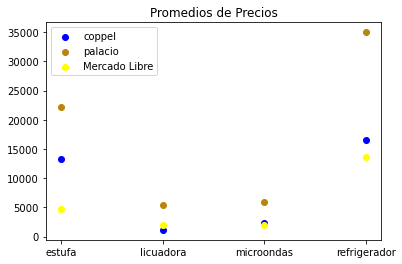

In [18]:
###GRAFICA 1: Comparación de los precios oferta promedio de cada producto en cada tienda

b_coppel = ps.sqldf("select marca as tipo_producto ,avg(precio_oferta) as avg_oferta, avg(precio) as avg_precio from df_coppel group by marca")
b_palacio = ps.sqldf("select marca as tipo_producto ,avg(precio_oferta) as avg_oferta, avg(precio) as avg_precio from df_palacio group by marca")
b_ml=ps.sqldf("select marca as tipo_producto ,avg(precio_oferta) as avg_oferta, avg(precio) as avg_precio from df_MercadoLibre group by marca")
fig, ax = plt.subplots()
ax.scatter(b_coppel.tipo_producto, b_coppel.avg_oferta,color="blue", label="coppel")
ax.scatter(b_palacio.tipo_producto, b_palacio.avg_oferta, color="darkgoldenrod",label="palacio")
ax.scatter(b_ml.tipo_producto, b_ml.avg_oferta,color="yellow",label="Mercado Libre")
plt.legend()
plt.title("Promedios de Precios")
plt.show()

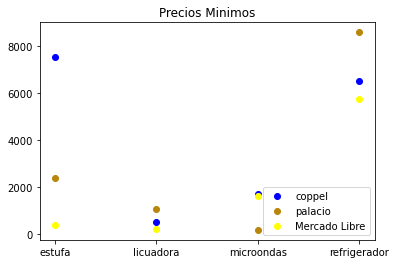

In [19]:
###GRAFICA 2: Comparación de los precios oferta minimos de cada producto en cada tienda
b_coppel = ps.sqldf("select marca as tipo_producto ,min(precio_oferta) as min_oferta, min(precio) as min_precio from df_coppel group by marca")
b_palacio = ps.sqldf("select marca as tipo_producto ,min(precio_oferta) as min_oferta, min(precio) as min_precio from df_palacio group by marca")
b_ml=ps.sqldf("select marca as tipo_producto ,min(precio_oferta) as min_oferta, min(precio) as min_precio from df_MercadoLibre group by marca")
fig, ax = plt.subplots()
ax.scatter(b_coppel.tipo_producto, b_coppel.min_oferta,color="blue", label="coppel")
ax.scatter(b_palacio.tipo_producto, b_palacio.min_oferta, color="darkgoldenrod",label="palacio")
ax.scatter(b_ml.tipo_producto, b_ml.min_oferta,color="yellow",label="Mercado Libre")
plt.legend()
plt.title("Precios Minimos")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

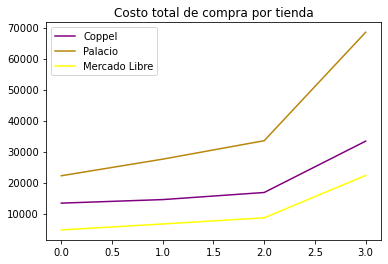

In [20]:
###GRAFICA 3: Muestra el total de la compra de los 4 productos en oferta en cada tienda (utilizando el promedio)
b_coppel = ps.sqldf("select marca as tipo_producto ,avg(precio_oferta) as avg_oferta, avg(precio) as avg_precio from df_coppel group by marca")
b_palacio = ps.sqldf("select marca as tipo_producto ,avg(precio_oferta) as avg_oferta, avg(precio) as avg_precio from df_palacio group by marca")
b_ml=ps.sqldf("select marca as tipo_producto ,avg(precio_oferta) as avg_oferta, avg(precio) as avg_precio from df_MercadoLibre group by marca")
plt.plot(b_coppel.avg_oferta.cumsum() ,color="purple",label="Coppel")
plt.plot(b_palacio.avg_oferta.cumsum() ,color="darkgoldenrod",label="Palacio")
plt.plot(b_ml.avg_oferta.cumsum() ,color="yellow",label="Mercado Libre")
plt.title("Costo total de compra por tienda")
plt.legend()
plt.show


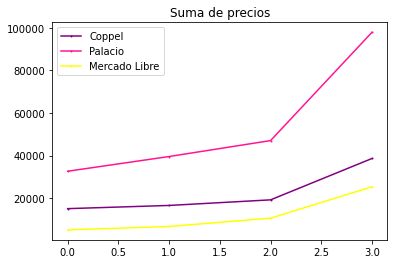

In [21]:
###GRAFICA 4: Muestra el total de la compra de los 4 productos con su costo original en cada tienda 
#(utilizando el promedio)

b_coppel = ps.sqldf("select marca as tipo_producto ,avg(precio) as avg_precio from df_coppel group by marca")
b_palacio = ps.sqldf("select marca as tipo_producto ,avg(precio) as avg_precio from df_palacio group by marca")
b_ml=ps.sqldf("select marca as tipo_producto ,avg(precio) as avg_precio from df_MercadoLibre group by marca")
plt.plot(b_coppel.avg_precio.cumsum(), marker="o",markersize=1 ,color="purple",label="Coppel")
plt.plot(b_palacio.avg_precio.cumsum(), marker="o",markersize=1 ,color="deeppink",label="Palacio")
plt.plot(b_ml.avg_precio.cumsum(), marker="o",markersize=1 ,color="yellow",label="Mercado Libre")
plt.title("Suma de precios")
plt.legend()

plt.show()

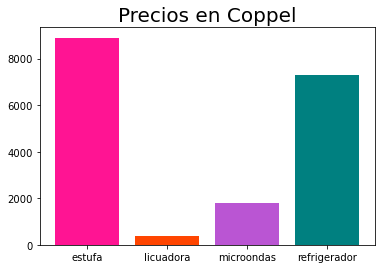

In [22]:
###GRAFICA 5: Costos minimo de cada producto en Coppel
b_coppel=ps.sqldf("select marca as tipo_producto, min(precio) as precio_min from df_coppel group by marca")
fig, ax = plt.subplots()
plt.bar(list(b_coppel.tipo_producto),list(b_coppel.precio_min), color=["deeppink","orangered","mediumorchid", "teal"],align='center')
plt.title("Precios en Coppel",fontsize=20)
names = list(b_coppel.tipo_producto)
ax.set_xticks(range(4))
ax.set_xticklabels(names)
plt.show()